<a href="https://colab.research.google.com/github/Daivar/ML-models-training/blob/main/Ensembles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ensemble learning, hard voting

In [1]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier 
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 
 
# ... these are separatelly tunnable
log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", random_state=42)
ensemble = [('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)]
voting_clf = VotingClassifier(estimators=ensemble, voting='hard') 

from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.912


In [2]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier 
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.10, random_state=42) # noise 0.1 (was 0.3)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 
 
# ... these are separatelly tunnable
log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", random_state=42)
ensemble = [('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)]
voting_clf = VotingClassifier(estimators=ensemble, voting='hard') 

from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 1.0
SVC 1.0
VotingClassifier 1.0


In [3]:
from sklearn.tree import DecisionTreeClassifier
 
dt_clf = DecisionTreeClassifier(max_depth=3)
dt_clf.fit(X_train, y_train)

print(accuracy_score(y_test, dt_clf.predict(X_test)))

0.904


In [4]:
ensemble.append(('dt', dt_clf))

print(ensemble)

voting_clf = VotingClassifier(estimators=ensemble, voting='hard') 
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

for _, clf in ensemble:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

print(voting_clf.__class__.__name__, accuracy_score(y_test, voting_clf.predict(X_test)))

[('lr', LogisticRegression(random_state=42)), ('rf', RandomForestClassifier(random_state=42)), ('svc', SVC(random_state=42)), ('dt', DecisionTreeClassifier(max_depth=3))]
LogisticRegression 0.864
RandomForestClassifier 1.0
SVC 1.0
DecisionTreeClassifier 0.904
VotingClassifier 0.92


without logistic regression(without weekest clasiffier): 

In [5]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier 
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.10, random_state=42) # noise 0.1 (was 0.3)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 
 
# ... these are separatelly tunnable
# log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", random_state=42)
ensemble = [('rf', rnd_clf), ('svc', svm_clf)]
voting_clf = VotingClassifier(estimators=ensemble, voting='hard') 

from sklearn.metrics import accuracy_score
for clf in (rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

RandomForestClassifier 1.0
SVC 1.0
VotingClassifier 1.0


In [6]:
ensemble.append(('dt', dt_clf))

print(ensemble)

voting_clf = VotingClassifier(estimators=ensemble, voting='hard') 
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

for _, clf in ensemble:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

print(voting_clf.__class__.__name__, accuracy_score(y_test, voting_clf.predict(X_test)))

[('rf', RandomForestClassifier(random_state=42)), ('svc', SVC(random_state=42)), ('dt', DecisionTreeClassifier(max_depth=3))]
RandomForestClassifier 1.0
SVC 1.0
DecisionTreeClassifier 0.904
VotingClassifier 1.0


### Soft voting

In [7]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import VotingClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 
 
dt_clf = DecisionTreeClassifier(max_depth=3)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", probability=True, random_state=42, C=50)
ensemble = [('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)]
 
voting_clf = VotingClassifier(estimators=ensemble, voting='soft') 
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

for clf in (dt_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

DecisionTreeClassifier 0.896
RandomForestClassifier 0.896
SVC 0.888
VotingClassifier 0.912


### Bagging and Pasting in Scikit

In [8]:
from sklearn.ensemble import BaggingClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 
 
dtc = DecisionTreeClassifier(max_depth=4)
bag_clf = BaggingClassifier(dtc, n_estimators=1000, max_samples=100, bootstrap=True, n_jobs=-1) # n_jobs=-1 treniruosis ant visų branduolių
bag_clf.fit(X_train, y_train) 
y_pred = bag_clf.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.896


In [9]:
from sklearn.ensemble import BaggingClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 
 
dtc = DecisionTreeClassifier(max_depth=5) #max_depth=5
bag_clf = BaggingClassifier(dtc, n_estimators=1000, max_samples=300, bootstrap=True, n_jobs=-1) # samples - 300
bag_clf.fit(X_train, y_train) 
y_pred = bag_clf.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.904


In [10]:
from sklearn.ensemble import BaggingClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 
 
dtc = DecisionTreeClassifier(max_depth=5) #max_depth=5
bag_clf = BaggingClassifier(dtc, n_estimators=1000, max_samples=300, bootstrap=False, n_jobs=-1) # bootstrap = True veikia geriau
bag_clf.fit(X_train, y_train) 
y_pred = bag_clf.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.888


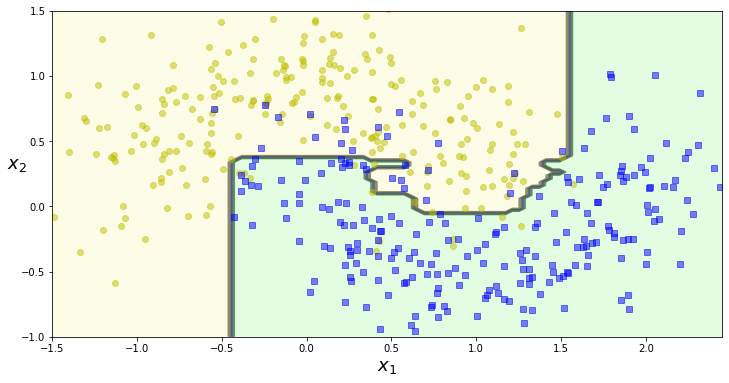

In [11]:
# ref: https://github.com/ageron/handson-ml2/blob/master/06_decision_trees.ipynb

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

# TODO :: add the ability to plot decision boundaries based on unbounded number of features
def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

plt.figure(figsize=(12, 6))
plot_decision_boundary(bag_clf, X, y)
plt.show()

### OOB

In [12]:
from sklearn.ensemble import BaggingClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)

dtc = DecisionTreeClassifier(max_depth=4)
bag_clf = BaggingClassifier(dtc, n_estimators=1000, max_samples=100, bootstrap=True, n_jobs=-1, oob_score=True) 
bag_clf.fit(X, y) 
y_pred = bag_clf.predict(X)

from sklearn.metrics import accuracy_score
print(accuracy_score(y, y_pred))
print(bag_clf.oob_score_)

0.914
0.882


Random Forerests

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
import numpy as np

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(max_features="sqrt", max_leaf_nodes=16),
    n_estimators=500, random_state=42)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

np.sum(y_pred == y_pred_rf) / len(y_pred)  # very similar predictions


1.0

In [14]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
import numpy as np

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(max_features="sqrt", max_leaf_nodes=16),
    n_estimators=500, random_state=42)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

np.sum(y_pred == y_pred_rf) / len(y_pred)  # very similar predictions


from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred_rf))
print(accuracy_score(y_test, y_pred))

0.912
0.912


In [15]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score
import numpy as np

X, y = make_moons(n_samples=1000, noise=0.10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 

rnd_clf = RandomForestClassifier(n_estimators=1000, max_leaf_nodes=6, random_state=42)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(max_features="sqrt", max_leaf_nodes=16),
    n_estimators=500, random_state=42)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

np.sum(y_pred == y_pred_rf) / len(y_pred)  # very similar predictions


print(accuracy_score(y_test, y_pred_rf))
print(accuracy_score(y_test, y_pred))

0.992
1.0


In [16]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
import numpy as np
from sklearn.metrics import accuracy_score
import pandas as pd


def train_score_model(x, y, **kwargs):
  x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=10, test_size=0.2)
  clf = ExtraTreesClassifier(**kwargs) # n_estimators=500, max_leaf_nodes=16, random_state=42, n_jobs=-1
  clf.fit(x_train, y_train)
  return accuracy_score(y_test, clf.predict(x_test))

max_score = 0
best_estimator = 100

df = pd.DataFrame(columns=['max_score', 'estimator'])

for i in range(100, 1000, 100):
  score = train_score_model(X, y, n_estimators=i, max_leaf_nodes=16, random_state=10, n_jobs=-1)
  df = df.append({'max_score': score, 'estimator': i}, ignore_index=True)
  if score > max_score:
    max_score = score
    best_estimator = i
df

,max_score,estimator
0,0.995,100.0
1,0.995,200.0
2,0.995,300.0
3,0.995,400.0
4,0.995,500.0
5,0.995,600.0
6,0.995,700.0
7,0.995,800.0
8,0.995,900.0


In [17]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score
import numpy as np

def compare_models_accuracy(x, y, params):
  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 

  rnd_clf = RandomForestClassifier(**params)
  rnd_clf.fit(X_train, y_train)
  y_pred_rf = rnd_clf.predict(X_test)

  ext_clf = ExtraTreesClassifier(**params)
  ext_clf.fit(X_train, y_train)
  y_pred_ext = ext_clf.predict(X_test)

  #np.sum(y_pred_ext == y_pred_rf) / len(y_test)  # very similar predictions

  return accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_ext)

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)

print('--- n_estimators 50 to 500: ----- ')
for i in range(1, 11):
  print(50 * i, ' => ', compare_models_accuracy(X, y, {'n_estimators': 50 * i, 'random_state': 42, 'max_leaf_nodes': 16}))

print('\n--- max_leaf_nodes 2 to 20: ----- ')
for i in range(2, 21):
  print(i, ' => ', compare_models_accuracy(X, y, {'n_estimators': 500, 'random_state': 42, 'max_leaf_nodes': i}))

print('\n--- max_features "sqrt", "log2": ----- ')
for mf in ['sqrt', 'log2']:
  print(mf, ' => ', compare_models_accuracy(X, y, {'n_estimators': 500, 'random_state': 42, 'max_leaf_nodes': i, 'max_features': mf}))

--- n_estimators 50 to 500: ----- 
50  =>  (0.92, 0.904)
100  =>  (0.928, 0.92)
150  =>  (0.928, 0.92)
200  =>  (0.912, 0.912)
250  =>  (0.912, 0.912)
300  =>  (0.912, 0.912)
350  =>  (0.912, 0.912)
400  =>  (0.904, 0.912)
450  =>  (0.912, 0.912)
500  =>  (0.912, 0.912)

--- max_leaf_nodes 2 to 20: ----- 
2  =>  (0.816, 0.856)
3  =>  (0.88, 0.864)
4  =>  (0.872, 0.864)
5  =>  (0.88, 0.872)
6  =>  (0.92, 0.872)
7  =>  (0.92, 0.88)
8  =>  (0.912, 0.88)
9  =>  (0.912, 0.872)
10  =>  (0.92, 0.88)
11  =>  (0.92, 0.88)
12  =>  (0.92, 0.896)
13  =>  (0.92, 0.896)
14  =>  (0.912, 0.912)
15  =>  (0.912, 0.912)
16  =>  (0.912, 0.912)
17  =>  (0.904, 0.912)
18  =>  (0.896, 0.912)
19  =>  (0.896, 0.912)
20  =>  (0.896, 0.912)

--- max_features "sqrt", "log2": ----- 
sqrt  =>  (0.896, 0.912)
log2  =>  (0.896, 0.912)


In [ ]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
import numpy as np
from sklearn.metrics import accuracy_score
import pandas as pd

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)

def train_score_model(x, y, **kwargs):
  x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=10, test_size=0.2)
  et_clf = ExtraTreesClassifier(**kwargs) # n_estimators=500, max_leaf_nodes=16, random_state=42, n_jobs=-1
  et_clf.fit(x_train, y_train)
  rf_clt = RandomForestClassifier(**kwargs) # n_estimators=500, max_leaf_nodes=16, random_state=42, n_jobs=-1
  rf_clt.fit(x_train, y_train)
  return accuracy_score(y_test, et_clf.predict(x_test)), accuracy_score(y_test, rf_clt.predict(x_test))

df = pd.DataFrame(columns=['score', 'estimator'])

for i in range(10, 500, 50):
  score_et, score_rf = train_score_model(X, y, n_estimators=i, max_leaf_nodes=16, random_state=10, n_jobs=-1)
  df = df.append({'estimator': i, 'score_et': score_et, 'score_rf': score_rf}, ignore_index=True)

df

,score,estimator,score_et,score_rf
0,NaN,10.0,0.88,0.94
1,NaN,60.0,0.89,0.94
2,NaN,110.0,0.90,0.95
3,NaN,160.0,0.90,0.94
4,NaN,210.0,0.89,0.93
5,NaN,260.0,0.90,0.93
6,NaN,310.0,0.90,0.93
7,NaN,360.0,0.90,0.93
8,NaN,410.0,0.90,0.93
9,NaN,460.0,0.90,0.93


Feature importance

In [18]:
from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, random_state=42)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.11249225099876375
sepal width (cm) 0.02311928828251033
petal length (cm) 0.4410304643639577
petal width (cm) 0.4233579963547682


In [19]:
rnd_clf.feature_importances_

array([0.11249225, 0.02311929, 0.44103046, 0.423358  ])

In [20]:
from sklearn.datasets import load_iris
iris = load_iris()
# rnd_clf = RandomForestClassifier(n_estimators=500, random_state=42)
rnd_clf = ExtraTreesClassifier(n_estimators=500, random_state=42)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.09171035483672016
sepal width (cm) 0.054909352517916524
petal length (cm) 0.4218042002574349
petal width (cm) 0.4315760923879283


Boosting, AdaBoost

In [21]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200, random_state=42)

[0.785 0.215]


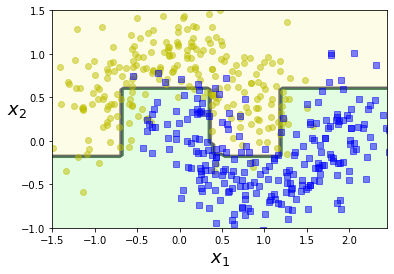

In [22]:
plot_decision_boundary(ada_clf, X, y)
print(ada_clf.feature_importances_)

In [23]:
from sklearn.ensemble import AdaBoostClassifier

X_train, y_train = load_iris(return_X_y=True)

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2), 
    n_estimators=7000, 
    algorithm="SAMME", # algorithm='SAMME.R'
    learning_rate=0.1, 
    random_state=42)


ada_clf.fit(X_train[:, 2:], y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.1, n_estimators=7000, random_state=42)

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:631: RuntimeWarning: invalid value encountered in true_divide
  return self.tree_.compute_feature_importances()


[nan nan]
0.9933333333333333


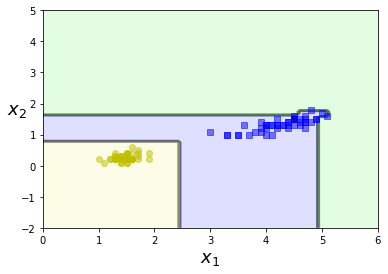

In [24]:
plot_decision_boundary(ada_clf, X_train[:, 2:], y_train, axes=[0, 6, -2, 5])
print(ada_clf.feature_importances_)
print(accuracy_score(y_train, ada_clf.predict(X_train[:, 2:])))

In [25]:
from sklearn.ensemble import AdaBoostClassifier

# X_train, y_train = load_iris(return_X_y=True)
X_train, y_train = make_moons(n_samples=500, noise=0.30, random_state=42)

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2), 
    n_estimators=2000, # 200
    algorithm="SAMME", # algorithm="SAMME.R"
    learning_rate=0.01, # 0.1
    random_state=42)

# ada_clf.fit(X_train[:, 2:], y_train)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.01, n_estimators=2000, random_state=42)

[0.52175068 0.47824932]
0.926


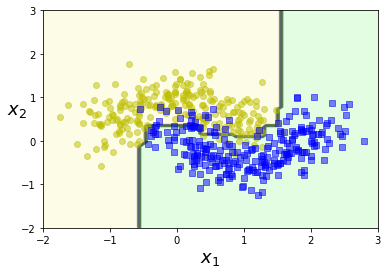

In [28]:
plot_decision_boundary(ada_clf, X_train, y_train, axes=[-2, 3, -2, 3]) # X_train[:, 2:]
print(ada_clf.feature_importances_)
print(accuracy_score(y_train, ada_clf.predict(X_train))) # X_train[:, 2:]

In [30]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_moons

# X_train, y_train = load_iris(return_X_y=True)
X_train, y_train = make_moons(n_samples=500, noise=0.30, random_state=42)

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2), 
    n_estimators=2000, # 200
    algorithm="SAMME.R", # algorithm="SAMME.R"
    learning_rate=0.5, # 0.1
    random_state=42)

# ada_clf.fit(X_train[:, 2:], y_train)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.5, n_estimators=2000, random_state=42)

[0.53989377 0.46010623]
1.0


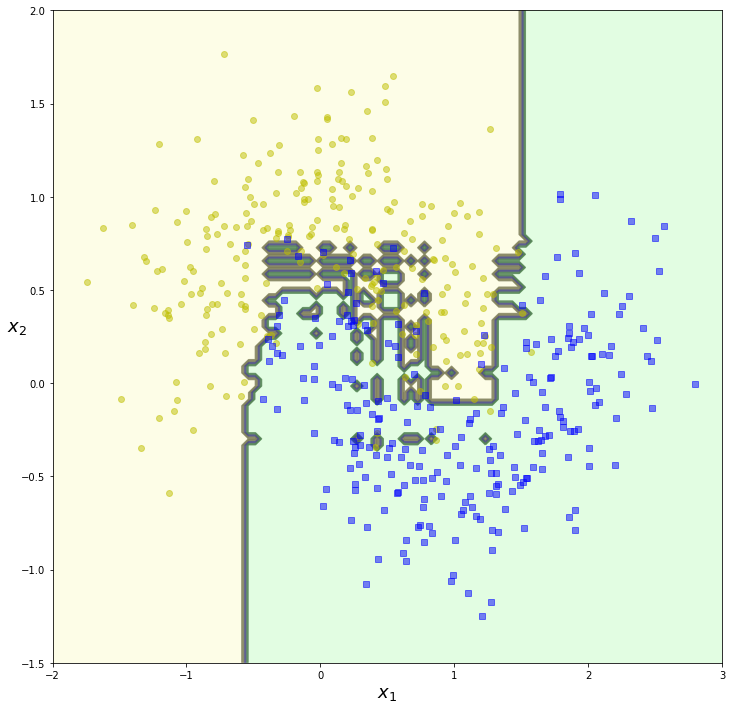

In [35]:
plt.figure(figsize=(12, 12))
plot_decision_boundary(ada_clf, X_train, y_train, axes=[-2, 3, -1.5, 2]) 
print(ada_clf.feature_importances_)
print(accuracy_score(y_train, ada_clf.predict(X_train)))

Gradient Boosting

In [36]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [37]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [38]:
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(X, y2)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [39]:
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [40]:
X_new = np.array([[0.4]])

In [41]:
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))
y_pred

array([0.49995198])

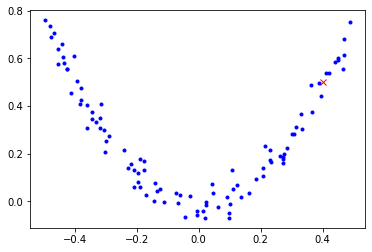

In [42]:
plt.plot(X[:, 0], y, "b.", label=None)
plt.plot(X_new, y_pred, "rx", linewidth=2, label=None)

In [43]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=5, learning_rate=1.0, random_state=42)
gbrt.fit(X, y)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=5,
                          random_state=42)

In [44]:
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(X, y2) # passing residual errors

DecisionTreeRegressor(max_depth=2, random_state=42)

In [45]:
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg3.fit(X, y3) # passing another level of resitual errors

DecisionTreeRegressor(max_depth=2, random_state=42)

In [ ]:
X_new = np.array([[0.4]])

In [46]:
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))
y_pred

array([0.49995198])

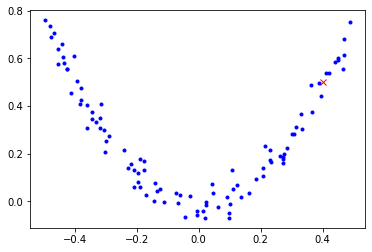

In [48]:
plt.plot(X[:, 0], y, "b.", label=None)
plt.plot(X_new, y_pred, "rx", linewidth=2, label=None)

In [49]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(
    max_depth=2, #tree high
    n_estimators=5, 
    learning_rate=1.0, 
    random_state=42)
gbrt.fit(X, y)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=5,
                          random_state=42)

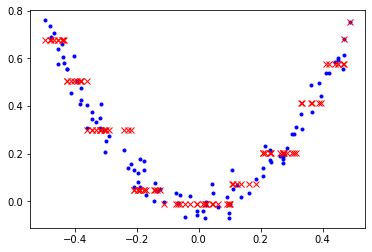

In [50]:
plt.plot(X[:, 0], y, "b.", label=None)
plt.plot(X, gbrt.predict(X), "rx", linewidth=2, label=None)

In [97]:
gbrt = GradientBoostingRegressor(
    max_depth=2, #tree high
    n_estimators=1000, 
    learning_rate=0.1, 
    random_state=42)
gbrt.fit(X, y)

GradientBoostingRegressor(max_depth=2, n_estimators=1000, random_state=42)

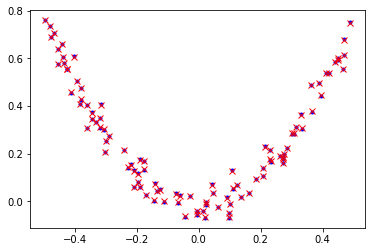

In [98]:
plt.plot(X[:, 0], y, "b.", label=None)
plt.plot(X, gbrt.predict(X), "rx", linewidth=2, label=None)

In [68]:
from sklearn.tree import DecisionTreeClassifier
 
dt_clf = DecisionTreeClassifier(max_depth=3)
dt_clf.fit(X_train, y_train)

print(accuracy_score(y_test, dt_clf.predict(X_test)))

0.92


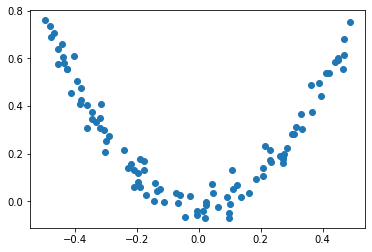

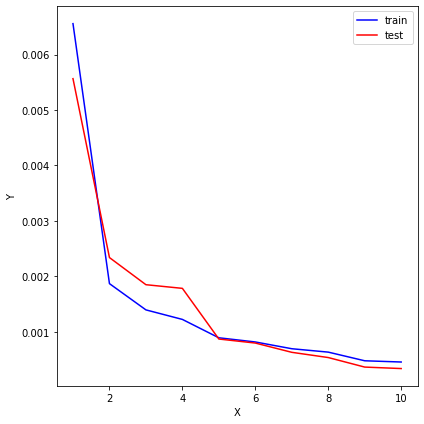

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

plt.scatter(X, y)
plt.show()

## CHANGE ESTIMATORS

gbrt = GradientBoostingRegressor(
    max_depth=3, # tree height
    n_estimators=10, 
    learning_rate=1, 
    random_state=42
)
gbrt.fit(X, y)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

test_score = np.zeros((gbrt.get_params()["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(gbrt.staged_predict(x_test)):
    test_score[i] = gbrt.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.plot(
    np.arange(gbrt.get_params()["n_estimators"]) + 1,
    gbrt.train_score_,
    "b-",
    label="train",
)
plt.plot(
    np.arange(gbrt.get_params()["n_estimators"]) + 1, test_score, "r-", label="test"
)
plt.legend(loc="upper right")
plt.xlabel("X")
plt.ylabel("Y")
fig.tight_layout()
plt.show()

In [89]:
print("r2_score", r2_score(y_test, gbrt.predict(x_test)))
print("mean_squared_error", mean_squared_error(y_test, gbrt.predict(x_test)))
print("mean_absolute_error", mean_absolute_error(y_test, gbrt.predict(x_test)))

r2_score 0.9939955677103536
mean_squared_error 0.0003356139792650786
mean_absolute_error 0.014775327670774763


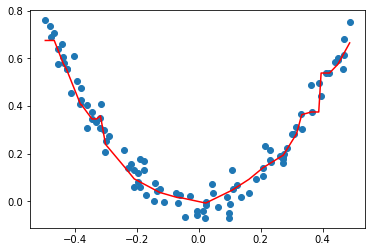

r2_score 0.9477783936776208
mean_squared_error 0.002918893953003502
mean_absolute_error 0.04134527321212556


In [105]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
Y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

# plt.show()

## CHANGE ESTIMATORS

gbrt = GradientBoostingRegressor(
    max_depth=2, # tree height
    n_estimators=1000, 
    learning_rate=0.01, 
    random_state=42
)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
gbrt.fit(x_train, y_train)

pred_y = gbrt.predict(x_test)

dots = []

for x, y in zip(x_test, pred_y):
  dots.append((x, y))

dots = sorted(dots, key=lambda x: x[0])

xx = []
yy = []

for x, y in dots:
  xx.append(x)
  yy.append(y)

# plt.plot(X[:, 0], y, "b.", label=None)
plt.scatter(X, Y)
plt.plot(xx, yy, "r-")
plt.show()
print("r2_score", r2_score(y_test, gbrt.predict(x_test)))
print("mean_squared_error", mean_squared_error(y_test, gbrt.predict(x_test)))
print("mean_absolute_error", mean_absolute_error(y_test, gbrt.predict(x_test)))

### Early stoping

In [109]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [110]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=5, learning_rate=1.0, random_state=42)
gbrt.fit(X, y)

gbrt_slow = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.1, random_state=42)
gbrt_slow.fit(X, y)

GradientBoostingRegressor(max_depth=2, n_estimators=200, random_state=42)

In [112]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

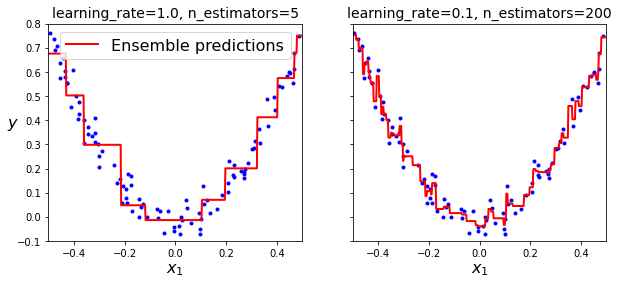

In [113]:
fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)

plt.sca(axes[0])
plot_predictions([gbrt], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="Ensemble predictions")
plt.title("learning_rate={}, n_estimators={}".format(gbrt.learning_rate, gbrt.n_estimators), fontsize=14)
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.sca(axes[1])
plot_predictions([gbrt_slow], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("learning_rate={}, n_estimators={}".format(gbrt_slow.learning_rate, gbrt_slow.n_estimators), fontsize=14)
plt.xlabel("$x_1$", fontsize=16)

plt.show()

In [114]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=49)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)
gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_val, y_pred) for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors) + 1

gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=bst_n_estimators, random_state=42)
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=56, random_state=42)

In [116]:
min_error = np.min(errors)

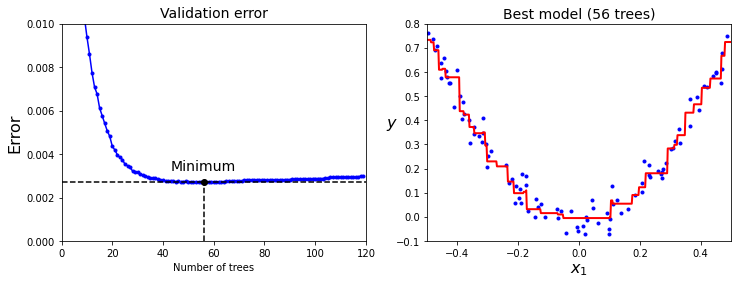

In [117]:
plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.plot(errors, "b.-")
plt.plot([bst_n_estimators, bst_n_estimators], [0, min_error], "k--")
plt.plot([0, 120], [min_error, min_error], "k--")
plt.plot(bst_n_estimators, min_error, "ko")
plt.text(bst_n_estimators, min_error*1.2, "Minimum", ha="center", fontsize=14)
plt.axis([0, 120, 0, 0.01])
plt.xlabel("Number of trees")
plt.ylabel("Error", fontsize=16)
plt.title("Validation error", fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_best], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("Best model (%d trees)" % bst_n_estimators, fontsize=14)
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.xlabel("$x_1$", fontsize=16)

plt.show()

In [133]:
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True, random_state=42, learning_rate=0.05)

min_val_error = float("inf")
error_going_up = 0
stop_after_error_was_going_up_times = 6
for n_estimators in range(1, 300):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == stop_after_error_was_going_up_times:
            break  # early stopping

In [134]:
print(gbrt.n_estimators)

121


In [135]:
print("Minimum validation MSE:", min_val_error)

Minimum validation MSE: 0.002694283337938586


### XGBoost

In [136]:
from xgboost import XGBRegressor as XGBR

xgb_reg = XGBR(random_state=42)
xgb_reg.fit(X_train, y_train)
y_pred = xgb_reg.predict(X_val)
val_error = mean_squared_error(y_val, y_pred) # Not shown
print("Validation MSE:", val_error)           # Not shown

[19:13:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation MSE: 0.0028512559726563943


In [137]:
xgb_reg.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=2)
y_pred = xgb_reg.predict(X_val)
val_error = mean_squared_error(y_val, y_pred)
print("Validation MSE:", val_error)

[19:14:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:0.286719
Will train until validation_0-rmse hasn't improved in 2 rounds.
[1]	validation_0-rmse:0.258221
[2]	validation_0-rmse:0.232634
[3]	validation_0-rmse:0.210526
[4]	validation_0-rmse:0.190232
[5]	validation_0-rmse:0.172196
[6]	validation_0-rmse:0.156394
[7]	validation_0-rmse:0.142241
[8]	validation_0-rmse:0.129789
[9]	validation_0-rmse:0.118752
[10]	validation_0-rmse:0.108388
[11]	validation_0-rmse:0.100155
[12]	validation_0-rmse:0.09208
[13]	validation_0-rmse:0.084791
[14]	validation_0-rmse:0.078699
[15]	validation_0-rmse:0.073248
[16]	validation_0-rmse:0.069391
[17]	validation_0-rmse:0.066277
[18]	validation_0-rmse:0.063458
[19]	validation_0-rmse:0.060326
[20]	validation_0-rmse:0.0578
[21]	validation_0-rmse:0.055643
[22]	validation_0-rmse:0.053943
[23]	validation_0-rmse:0.053138
[24]	validation_0-rmse:0.052415
[25]	validation_0-rmse

In [ ]:
%timeit XGBR().fit(X_train, y_train)

In [139]:
%timeit GradientBoostingRegressor().fit(X_train, y_train)

10 loops, best of 5: 22.5 ms per loop
